<a href="https://colab.research.google.com/github/yania-n/CLI/blob/main/exercise_5/facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install facenet_pytorch

In [ ]:
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
import matplotlib.pyplot as plt

In [ ]:
def load_image(image_path):
  image = cv2.imread(image_path)
  return image

def face_embedding(image):
  mtcnn = MTCNN(image_size=240, margin=0, min_face_size=20)
  face = mtcnn(image)
  resnet = InceptionResnetV1(pretrained='vggface2').eval()
  embedding = resnet(face.unsqueeze(0))
  normalize_embedding = torch.nn.functional.normalize(embedding)
  return normalize_embedding

In [ ]:
def image_and_embedding(image_path):
  image = load_image(image_path)
  embedding = face_embedding(image)
  return image, embedding

In [ ]:
def face_similarity(reference,input,thres=1.2):
  similarity_score = torch.nn.functional.pairwise_distance(reference, input)

  if similarity_score > thres:
    result = "Face not matched"

  else:
    result = "Face matched"

  return result, similarity_score

In [ ]:
def show_result(input_image, ref_image, result):
  print(result.upper())
  plt.subplot(1,2,1)
  plt.imshow(input_image)
  plt.subplot(1,2,2)
  plt.imshow(ref_image)
  plt.show

In [ ]:
input_image_path = "exercise_5\inputImages\image2.png"
input_image, input_embedding = image_and_embedding(input_image_path)

In [ ]:
ref_image_path = "exercise_5\referenceImage\reference.png"
ref_image, ref_embedding = image_and_embedding(ref_image_path)

FACE NOT MATCHED


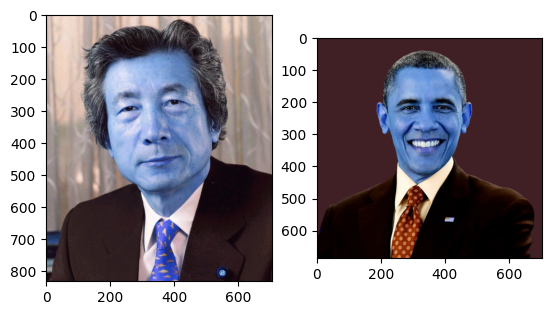

In [ ]:
result, similarity_score = face_similarity(ref_embedding, input_embedding)
show_result(input_image=input_image, ref_image=ref_image, result=result)

FACE MATCHED


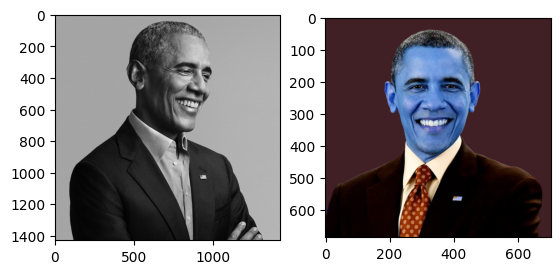

In [ ]:
input_image_path = "exercise_5\inputImages\image3.png"
input_image, input_embedding = image_and_embedding(input_image_path)
result, similarity_score = face_similarity(ref_embedding, input_embedding)
show_result(input_image=input_image, ref_image=ref_image, result=result)

FACE NOT MATCHED


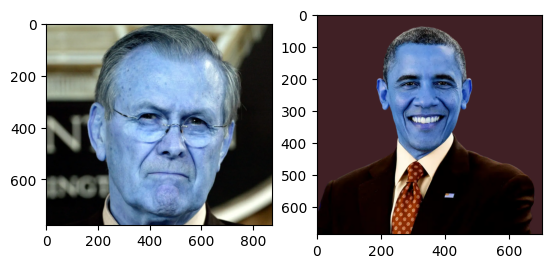

In [ ]:
input_image_path = "exercise_5\inputImages\image1.png"
input_image, input_embedding = image_and_embedding(input_image_path)
result, similarity_score = face_similarity(ref_embedding, input_embedding)
show_result(input_image=input_image, ref_image=ref_image, result=result)